In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import scipy.stats as stats
from numpy import cov
from scipy.stats import linregress
from scipy.stats import pearsonr

# Tennessee

In [2]:
# Files to open
tennessee_overdose = pd.read_csv("csv_series/overdose_Tennessee.csv")
tennessee_unemployment = pd.read_csv("csv_series/unemployment_states42.csv")
tennessee_earnings = pd.read_csv("csv_series/earnings_states42.csv")


In [3]:
tennessee_overdose.head()
tennessee_overdose = tennessee_overdose.sort_values(["Year"], ascending=False)
tennessee_overdose.head()

,Location,Year,All Drug Overdose Death Rate (Age-Adjusted),All Drug Overdose Death Rate (Age-Adjusted) (missing reason),Opioid Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted) (missing reason),Percent Change in All Drug Overdose Death Rate from Prior Year,Percent Change in All Drug Overdose Death Rate from Prior Year (missing reason),Percent Change in Opioid Overdose Death Rate from Prior Year,Percent Change in Opioid Overdose Death Rate from Prior Year (missing reason)
10,Tennessee,2015,22.2,NaN,16.0,NaN,0.14,NaN,0.19,NaN
0,Tennessee,2014,19.5,NaN,13.4,NaN,0.08,NaN,0.13,NaN
7,Tennessee,2013,18.1,NaN,11.9,NaN,0.03,NaN,0.04,NaN
12,Tennessee,2012,17.6,NaN,11.4,NaN,0.02,NaN,0.13,NaN
15,Tennessee,2011,17.2,NaN,10.1,NaN,0.02,NaN,0.01,NaN


In [4]:
tennessee_unemployment.head()

,state_id,year,unemployment_rate
0,42,2018,3.3
1,42,2017,3.5
2,42,2016,4.6
3,42,2015,4.9
4,42,2014,6.3


In [5]:
tennessee_earnings.head()

,state_id,year,earnings,pct_change
0,42,2018,2560978,1.6
1,42,2017,2519935,1.7
2,42,2016,2478737,2.7
3,42,2015,2414236,3.1
4,42,2014,2342369,2.5


In [6]:
combined_unemp_earn = pd.merge(tennessee_unemployment, tennessee_earnings, how="outer", on=['year'])
combined_unemp_earn.head()

,state_id_x,year,unemployment_rate,state_id_y,earnings,pct_change
0,42,2018,3.3,42.0,2560978.0,1.6
1,42,2017,3.5,42.0,2519935.0,1.7
2,42,2016,4.6,42.0,2478737.0,2.7
3,42,2015,4.9,42.0,2414236.0,3.1
4,42,2014,6.3,42.0,2342369.0,2.5


In [7]:
clean_unemp_earn = combined_unemp_earn[['state_id_x', 'year', 'unemployment_rate', 'earnings', 'pct_change']]
clean_unemp_earn = clean_unemp_earn.rename(columns={"state_id_x":"state", 'year': 'Year'})
clean_unemp_earn.head()

,state,Year,unemployment_rate,earnings,pct_change
0,42,2018,3.3,2560978.0,1.6
1,42,2017,3.5,2519935.0,1.7
2,42,2016,4.6,2478737.0,2.7
3,42,2015,4.9,2414236.0,3.1
4,42,2014,6.3,2342369.0,2.5


In [8]:
tennessee_combined = pd.merge(clean_unemp_earn, tennessee_overdose, how="outer", on=['Year'])
tennessee_combined_df = tennessee_combined[['Location','Year','unemployment_rate', 'earnings', 'pct_change', 
                                        'All Drug Overdose Death Rate (Age-Adjusted)', 
                                        'Opioid Overdose Death Rate (Age-Adjusted)',
                                        'Percent Change in All Drug Overdose Death Rate from Prior Year', 
                                        'Percent Change in Opioid Overdose Death Rate from Prior Year']]
tennessee_combined_df


,Location,Year,unemployment_rate,earnings,pct_change,All Drug Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted),Percent Change in All Drug Overdose Death Rate from Prior Year,Percent Change in Opioid Overdose Death Rate from Prior Year
0,NaN,2018,3.3,2560978.0,1.6,NaN,NaN,NaN,NaN
1,NaN,2017,3.5,2519935.0,1.7,NaN,NaN,NaN,NaN
2,NaN,2016,4.6,2478737.0,2.7,NaN,NaN,NaN,NaN
3,Tennessee,2015,4.9,2414236.0,3.1,22.2,16.0,0.14,0.19
4,Tennessee,2014,6.3,2342369.0,2.5,19.5,13.4,0.08,0.13
5,Tennessee,2013,7.1,2284291.0,1.9,18.1,11.9,0.03,0.04
6,Tennessee,2012,7.8,2240924.0,2.5,17.6,11.4,0.02,0.13
7,Tennessee,2011,8.1,2185720.0,2.2,17.2,10.1,0.02,0.01
8,Tennessee,2010,9.5,2138215.0,-0.5,16.9,10.0,0.11,0.18
9,Tennessee,2009,10.5,2149141.0,-6.8,15.2,8.5,0.03,0.10


In [9]:
tennessee_combined_sort = tennessee_combined_df.sort_values(['Year'], ascending=True)
tennessee_combined_sort.reset_index(drop=True, inplace=True)
tennessee_combined_sort.head()

,Location,Year,unemployment_rate,earnings,pct_change,All Drug Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted),Percent Change in All Drug Overdose Death Rate from Prior Year,Percent Change in Opioid Overdose Death Rate from Prior Year
0,Tennessee,1999,NaN,NaN,NaN,6.1,1.6,NaN,NaN
1,Tennessee,2000,3.9,NaN,NaN,6.9,1.8,0.13,0.13
2,Tennessee,2001,5.7,NaN,NaN,7.3,2.4,0.06,0.33
3,Tennessee,2002,5.0,2209384.0,-1.5,8.5,2.9,0.16,0.21
4,Tennessee,2003,5.4,2204879.0,-0.2,11.3,5.0,0.33,0.72


In [10]:
tennessee_combined_sort['earnings_index'] = (tennessee_combined_sort['earnings']/tennessee_combined_sort.loc[3,'earnings'])*100
tennessee_combined_sort.head()

,Location,Year,unemployment_rate,earnings,pct_change,All Drug Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted),Percent Change in All Drug Overdose Death Rate from Prior Year,Percent Change in Opioid Overdose Death Rate from Prior Year,earnings_index
0,Tennessee,1999,NaN,NaN,NaN,6.1,1.6,NaN,NaN,NaN
1,Tennessee,2000,3.9,NaN,NaN,6.9,1.8,0.13,0.13,NaN
2,Tennessee,2001,5.7,NaN,NaN,7.3,2.4,0.06,0.33,NaN
3,Tennessee,2002,5.0,2209384.0,-1.5,8.5,2.9,0.16,0.21,100.000000
4,Tennessee,2003,5.4,2204879.0,-0.2,11.3,5.0,0.33,0.72,99.796097


In [11]:
tennessee_combined_final = tennessee_combined_sort.dropna()
tennessee_combined_final

,Location,Year,unemployment_rate,earnings,pct_change,All Drug Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted),Percent Change in All Drug Overdose Death Rate from Prior Year,Percent Change in Opioid Overdose Death Rate from Prior Year,earnings_index
3,Tennessee,2002,5.0,2209384.0,-1.5,8.5,2.9,0.16,0.21,100.000000
4,Tennessee,2003,5.4,2204879.0,-0.2,11.3,5.0,0.33,0.72,99.796097
5,Tennessee,2004,5.8,2246911.0,1.9,12.8,6.4,0.13,0.28,101.698528
6,Tennessee,2005,5.3,2286964.0,1.8,14.5,7.5,0.13,0.17,103.511386
7,Tennessee,2006,4.7,2325551.0,1.7,16.0,7.7,0.10,0.03,105.257891
8,Tennessee,2007,5.4,2335654.0,0.4,15.8,7.8,-0.01,0.01,105.715168
9,Tennessee,2008,8.5,2305933.0,-1.3,14.8,7.7,-0.06,-0.01,104.369951
10,Tennessee,2009,10.5,2149141.0,-6.8,15.2,8.5,0.03,0.10,97.273312
11,Tennessee,2010,9.5,2138215.0,-0.5,16.9,10.0,0.11,0.18,96.778785
12,Tennessee,2011,8.1,2185720.0,2.2,17.2,10.1,0.02,0.01,98.928932


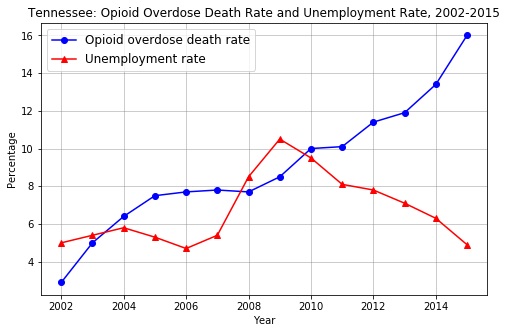

In [12]:
# Generate the plot
fig = plt.figure(figsize=(8,5))

# Create our x_axis list
x_axis = tennessee_combined_final['Year']

# Plot both of these lines so that they will appear on our final chart
overdose_handle, = plt.plot(x_axis, tennessee_combined_final['Opioid Overdose Death Rate (Age-Adjusted)'], marker ='o', 
                            color='blue', label='Opioid overdose death rate')
unemployment_handle, = plt.plot(x_axis, tennessee_combined_final['unemployment_rate'], marker='^', 
                                color='red', label="Unemployment rate")

plt.legend(loc='best',fontsize='large')
plt.grid(color='grey', alpha=0.5)

# Set a Title and labels

plt.title("Tennessee: Opioid Overdose Death Rate and Unemployment Rate, 2002-2015")
plt.xlabel("Year")
plt.ylabel("Percentage")
 
plt.savefig("images/Tennessee_overdose_unemployment.png")
plt.show()


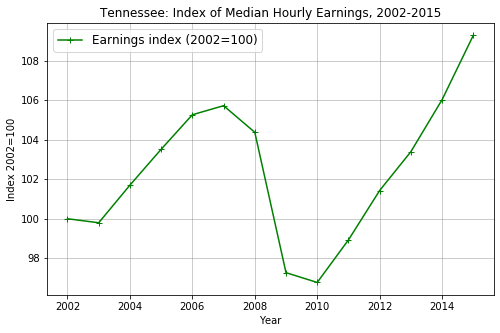

In [13]:
# Generate the plot
fig = plt.figure(figsize=(8,5))

# Create our x_axis list
x_axis = tennessee_combined_final['Year']

earnings_handle, = plt.plot(x_axis, tennessee_combined_final['earnings_index'], marker='+', 
                                 color='green', label="Earnings index (2002=100)")

plt.legend(loc='best',fontsize='large')
plt.grid(color='grey', alpha=0.5)

# Set a Title and labels

plt.title("Tennessee: Index of Median Hourly Earnings, 2002-2015")
plt.xlabel("Year")
plt.ylabel("Index 2002=100")
 
plt.savefig("images/Tennessee_earnings_index.png")
plt.show()

# Correlation between overdose and unemployment

In [14]:
# Set line
(slope, intercept, rvalue, pvalue, stderr) = linregress(tennessee_combined_final['unemployment_rate'],
                                                        tennessee_combined_final['Opioid Overdose Death Rate (Age-Adjusted)'])
fit = slope * tennessee_combined_final['unemployment_rate'] + intercept

In [15]:
corr, _ = pearsonr(tennessee_combined_final['unemployment_rate'], tennessee_combined_final['Opioid Overdose Death Rate (Age-Adjusted)'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.165


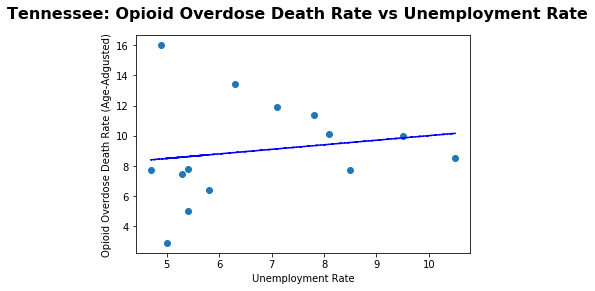

In [16]:
fig, ax = plt.subplots()

fig.suptitle("Tennessee: Opioid Overdose Death Rate vs Unemployment Rate", fontsize=16, fontweight="bold")

#ax.set_xlim(0, 10)
#ax.set_ylim(0, 10)

ax.set_xlabel("Unemployment Rate")
ax.set_ylabel("Opioid Overdose Death Rate (Age-Adgusted)")

ax.plot(tennessee_combined_final['unemployment_rate'], 
        tennessee_combined_final['Opioid Overdose Death Rate (Age-Adjusted)'], linewidth=0, marker='o')
ax.plot(tennessee_combined_final['unemployment_rate'], fit, 'b--')

plt.savefig("images/Tennessee_corr_overdose_unemployment.png")
plt.show()

# Correlation between overdose and earnings

In [17]:
# Set line
(slope, intercept, rvalue, pvalue, stderr) = linregress(tennessee_combined_final['earnings_index'],
                                                        tennessee_combined_final['Opioid Overdose Death Rate (Age-Adjusted)'])
fit = slope * tennessee_combined_final['earnings_index'] + intercept

In [18]:
corr, _ = pearsonr(tennessee_combined_final['earnings_index'], tennessee_combined_final['Opioid Overdose Death Rate (Age-Adjusted)'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.453


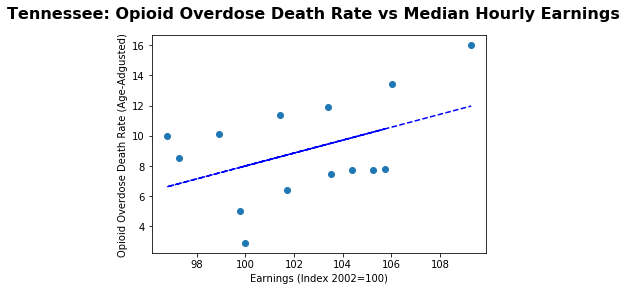

In [19]:
fig, ax = plt.subplots()

fig.suptitle("Tennessee: Opioid Overdose Death Rate vs Median Hourly Earnings", fontsize=16, fontweight="bold")

#ax.set_xlim(0, 10)
#ax.set_ylim(0, 10)

ax.set_xlabel("Earnings (Index 2002=100)")
ax.set_ylabel("Opioid Overdose Death Rate (Age-Adgusted)")

ax.plot(tennessee_combined_final['earnings_index'], 
        tennessee_combined_final['Opioid Overdose Death Rate (Age-Adjusted)'], linewidth=0, marker='o')
ax.plot(tennessee_combined_final['earnings_index'], fit, 'b--')

plt.savefig("images/Tennessee_corr_overdose_earnings.png")
plt.show()